### libray inclusion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,recall_score,roc_auc_score,auc,confusion_matrix,cohen_kappa_score, f1_score, precision_score,matthews_corrcoef 
from tqdm import tqdm
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectFromModel, SelectKBest
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Optional imports for preprocessing and visualization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

Radiomics Feature Analysis

In [4]:
Final_accuracy={}

In [5]:
df_rm=pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")

In [6]:
print(df_rm.shape,df_dl.shape)


(1114, 1221) (1114, 129)


In [7]:
df_rm['Malignancy'].value_counts()

0    828
1    286
Name: Malignancy, dtype: int64

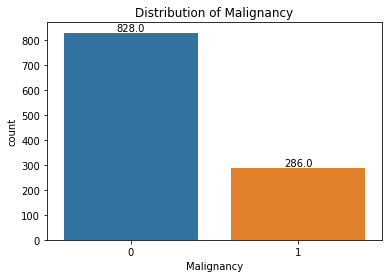

In [8]:
# If you want to order the bars by count, you can use the order parameter
order = df_rm['Malignancy'].value_counts().index
ax = sns.countplot(x='Malignancy', data=df_rm, order=order)

plt.title('Distribution of Malignancy')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [9]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the model
model = load_model('feature_extractor_model_27-05-2024_128.h5')

# Load or prepare your test data (replace this with your actual test data)
# X_test = ... 
# y_test = ...
train_data_path = r'./Train_Roi_file'
train_patients = [name for name in os.listdir(train_data_path) if os.path.isfile(os.path.join(train_data_path, name))]
file_list = sorted(train_patients)
print(file_list)

# For a classification model, you might need to convert predictions to class labels



['LIDC-IDRI-0001_1_roi.npy', 'LIDC-IDRI-0002_1_roi.npy', 'LIDC-IDRI-0003_1_roi.npy', 'LIDC-IDRI-0003_2_roi.npy', 'LIDC-IDRI-0003_3_roi.npy', 'LIDC-IDRI-0004_1_roi.npy', 'LIDC-IDRI-0005_1_roi.npy', 'LIDC-IDRI-0005_2_roi.npy', 'LIDC-IDRI-0006_1_roi.npy', 'LIDC-IDRI-0006_2_roi.npy', 'LIDC-IDRI-0007_1_roi.npy', 'LIDC-IDRI-0008_1_roi.npy', 'LIDC-IDRI-0008_2_roi.npy', 'LIDC-IDRI-0010_1_roi.npy', 'LIDC-IDRI-0010_2_roi.npy', 'LIDC-IDRI-0011_1_roi.npy', 'LIDC-IDRI-0011_2_roi.npy', 'LIDC-IDRI-0011_3_roi.npy', 'LIDC-IDRI-0011_4_roi.npy', 'LIDC-IDRI-0011_5_roi.npy', 'LIDC-IDRI-0011_6_roi.npy', 'LIDC-IDRI-0011_7_roi.npy', 'LIDC-IDRI-0012_1_roi.npy', 'LIDC-IDRI-0012_3_roi.npy', 'LIDC-IDRI-0012_4_roi.npy', 'LIDC-IDRI-0012_5_roi.npy', 'LIDC-IDRI-0012_6_roi.npy', 'LIDC-IDRI-0012_7_roi.npy', 'LIDC-IDRI-0013_2_roi.npy', 'LIDC-IDRI-0013_3_roi.npy', 'LIDC-IDRI-0014_1_roi.npy', 'LIDC-IDRI-0016_1_roi.npy', 'LIDC-IDRI-0016_2_roi.npy', 'LIDC-IDRI-0016_3_roi.npy', 'LIDC-IDRI-0016_4_roi.npy', 'LIDC-IDRI-0016_5_r

Fuse Model Analysis with 1218 Features and 128 Features

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df_rm = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
merged_data = pd.merge(df_rm, df_dl, on='Patient_id', how='inner')

print(merged_data.shape,df_rm.shape,df_dl.shape)
merged_data.head()
# Define features and target
X = merged_data.drop(columns=['Patient_id','Malignancy'])
y = merged_data['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")

    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    #y_test = np.array(y_test).reshape(-1)
    #y_pred = np.array(y_pred).reshape(-1)
    #print(y_pred.shape,y_pred)
    # Ensure y_test and y_pred are 1-dimensional
    #y_test = y_test.ravel()
   # y_pred = y_pred.ravel()
    
    #print(y_test.shape,y_test)
    #y_test = y_test.values[:, -1]
    #y_pred = y_pred[:, -1]
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
joblib.dump(best_model, 'best_random_forest_model_1218_128_features.pkl')

# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X)
y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file
df_predictions = pd.DataFrame({'True Label': y, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_1218.csv', index=False)
Final_accuracy['RM 1218 DL 128 Features']=best_accuracy
# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")


(1114, 1349) (1114, 1221) (1114, 129)
Fold 1:
------------------------------
Accuracy: 0.9488
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       167
           1       0.92      0.98      0.95       165

    accuracy                           0.95       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.95      0.95      0.95       332

Confusion Matrix:
 [[153  14]
 [  3 162]]
Fold 2:
------------------------------
Accuracy: 0.9517
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       157
           1       0.94      0.97      0.95       174

    accuracy                           0.95       331
   macro avg       0.95      0.95      0.95       331
weighted avg       0.95      0.95      0.95       331

Confusion Matrix:
 [[147  10]
 [  6 168]]
Fold 3:
------------------------------
Accuracy: 0.9335
Classifi

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Feature Selection 200+128

[0.00089525 0.00167356 0.00079642 ... 0.00087857 0.00062146 0.00075412]


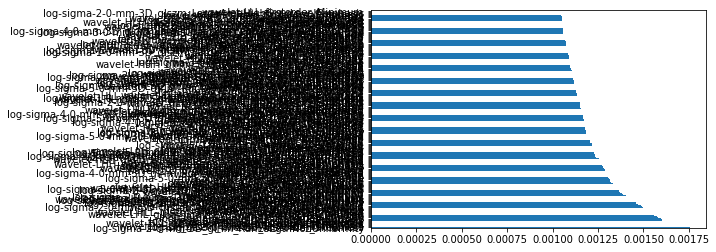

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
Rm_df = pd.read_csv('./Radiomics_Features_Train.csv')
Rm_df.fillna(0, inplace=True)
# Separate features (X) and target variable (y)
df=Rm_df.drop(columns=['Patient_id'])
X = df.drop('Malignancy', axis=1)
y = df['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

model = ExtraTreesClassifier()
model.fit(X_standardized,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(200).plot(kind='barh')
plt.show()

In [12]:
top_features_200 = feat_importances.nlargest(200)  # Get the top 200 features
RM_200_top_feature_names = top_features_200.index.tolist()  # Get the names of the top features as a list
print(RM_200_top_feature_names)
X_200=df[RM_200_top_feature_names]



['log-sigma-2-0-mm-3D_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Skewness', 'wavelet-HLH_glszm_LowGrayLevelZoneEmphasis', 'original_shape_Elongation', 'wavelet-HHH_glrlm_LongRunEmphasis', 'wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-LHL_glcm_InverseVariance', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-HLH_glrlm_LongRunEmphasis', 'wavelet-LLL_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Median', 'wavelet-LHL_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LHL_glcm_Id', 'wavelet-HLL_glszm_SmallAreaLowGrayLevelEmphasis', 'wavelet-LHH_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLL_firstorder_Skewness', 'wavelet-HHH_glrlm_RunVariance', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LHL_glrlm_LowGrayLevelRunEmphasis', 'wavelet-HLH_glrlm_RunVariance', 'log-sigma-1-0-mm-3D_gldm_DependenceNonUniformity', 'wavelet-LHL_glszm_HighG

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
print(df.shape,df_dl.shape)
X_200 = df[RM_200_top_feature_names]
X_200_DL_featues= pd.concat([X_200, df_dl], axis=1)
X_200_DL_featues=X_200_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_200_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_200_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_200_128_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_200_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 200 and 128 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")


(1114, 1221) (1114, 129)
Fold 1:
------------------------------
Accuracy: 0.9458
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       167
           1       0.91      0.99      0.95       165

    accuracy                           0.95       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.95      0.95      0.95       332

Confusion Matrix:
 [[151  16]
 [  2 163]]
Fold 2:
------------------------------
Accuracy: 0.9607
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       157
           1       0.95      0.98      0.96       174

    accuracy                           0.96       331
   macro avg       0.96      0.96      0.96       331
weighted avg       0.96      0.96      0.96       331

Confusion Matrix:
 [[148   9]
 [  4 170]]
Fold 3:
------------------------------
Accuracy: 0.9456
Classification Report

Radiomics Model with 100 

In [14]:
top_features_100 = feat_importances.nlargest(100)  # Get the top 100 features
RM_100_top_feature_names = top_features_100.index.tolist()  # Get the names of the top features as a list
print(RM_100_top_feature_names)
X_100=df[RM_100_top_feature_names]

['log-sigma-2-0-mm-3D_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Skewness', 'wavelet-HLH_glszm_LowGrayLevelZoneEmphasis', 'original_shape_Elongation', 'wavelet-HHH_glrlm_LongRunEmphasis', 'wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-LHL_glcm_InverseVariance', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-HLH_glrlm_LongRunEmphasis', 'wavelet-LLL_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Median', 'wavelet-LHL_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LHL_glcm_Id', 'wavelet-HLL_glszm_SmallAreaLowGrayLevelEmphasis', 'wavelet-LHH_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLL_firstorder_Skewness', 'wavelet-HHH_glrlm_RunVariance', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LHL_glrlm_LowGrayLevelRunEmphasis', 'wavelet-HLH_glrlm_RunVariance', 'log-sigma-1-0-mm-3D_gldm_DependenceNonUniformity', 'wavelet-LHL_glszm_HighG

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_100 = df[RM_100_top_feature_names]
X_100_DL_featues= pd.concat([X_100, df_dl], axis=1)
X_100_DL_featues=X_100_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_100_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_100_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_100_128_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_100_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 100 and 128 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9518
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       167
           1       0.92      0.99      0.95       165

    accuracy                           0.95       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.95      0.95      0.95       332

Confusion Matrix:
 [[153  14]
 [  2 163]]
Fold 2:
------------------------------
Accuracy: 0.9637
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       157
           1       0.95      0.98      0.97       174

    accuracy                           0.96       331
   macro avg       0.97      0.96      0.96       331
weighted avg       0.96      0.96      0.96       331

Confusion Matrix:
 [[148   9]
 [  3 171]]
Fold 3:
------------------------------
Accuracy: 0.9486
Classification Report:
               precisio

1218 RM and 20 Deep Learning

[2.03379154e-02 0.00000000e+00 0.00000000e+00 1.65345801e-02
 0.00000000e+00 4.19757890e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.30146102e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.68477580e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.97801301e-02 0.00000000e+00
 1.60978936e-02 1.55715116e-02 0.00000000e+00 4.19893636e-02
 1.62842886e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.25229476e-02 0.00000000e+00
 0.00000000e+00 4.30788029e-02 0.00000000e+00 1.28691852e-02
 0.00000000e+00 0.00000000e+00 1.70710600e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.85368004e-02
 0.00000000e+00 3.48200917e-02 2.51471765e-03 0.00000000e+00
 0.00000000e+00 1.76594292e-02 0.00000000e+00 1.96781018e-02
 0.00000000e+00 0.000000

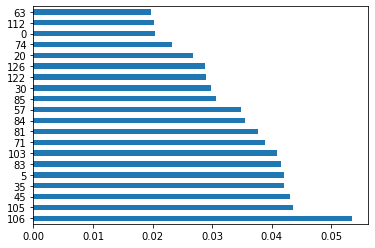

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
df_dl=pd.read_csv('./Deep_Learning_Features_Train.csv')
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl.fillna(0, inplace=True)
# Separate features (X) and target variable (y)


X=df_dl.drop(columns=['Patient_id'])

y = df['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

model = ExtraTreesClassifier()
model.fit(X_standardized,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [17]:
top_20_features = feat_importances.nlargest(20)  # Get the top 200 features
DL_20_top_feature_names = top_20_features.index.tolist()  # Get the names of the top features as a list
print(DL_20_top_feature_names)
X_20=df_dl[DL_20_top_feature_names]

top_10_features = feat_importances.nlargest(10)  # Get the top 200 features
DL_10_top_feature_names = top_10_features.index.tolist()  # Get the names of the top features as a list
print(DL_10_top_feature_names)
X_10=df_dl[DL_10_top_feature_names]


['106', '105', '45', '35', '5', '83', '103', '71', '81', '84', '57', '85', '30', '122', '126', '20', '74', '0', '112', '63']
['106', '105', '45', '35', '5', '83', '103', '71', '81', '84']


In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_rm=df.drop(['Patient_id','Malignancy'], axis=1)

X_20_DL_featues= pd.concat([X_rm, X_20], axis=1)

y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_20_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_20_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_1218_20_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_20_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 1218 and 20 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9488
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       167
           1       0.92      0.98      0.95       165

    accuracy                           0.95       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.95      0.95      0.95       332

Confusion Matrix:
 [[153  14]
 [  3 162]]
Fold 2:
------------------------------
Accuracy: 0.9456
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       157
           1       0.93      0.97      0.95       174

    accuracy                           0.95       331
   macro avg       0.95      0.94      0.95       331
weighted avg       0.95      0.95      0.95       331

Confusion Matrix:
 [[145  12]
 [  6 168]]
Fold 3:
------------------------------
Accuracy: 0.9275
Classification Report:
               precisio

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_rm=df.drop(['Patient_id','Malignancy'], axis=1)

X_10_DL_featues= pd.concat([X_rm, X_10], axis=1)

y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_10_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_10_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_1218_10_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_10_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 1218 and 10 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9367
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       167
           1       0.90      0.98      0.94       165

    accuracy                           0.94       332
   macro avg       0.94      0.94      0.94       332
weighted avg       0.94      0.94      0.94       332

Confusion Matrix:
 [[150  17]
 [  4 161]]
Fold 2:
------------------------------
Accuracy: 0.9366
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       157
           1       0.92      0.97      0.94       174

    accuracy                           0.94       331
   macro avg       0.94      0.93      0.94       331
weighted avg       0.94      0.94      0.94       331

Confusion Matrix:
 [[142  15]
 [  6 168]]
Fold 3:
------------------------------
Accuracy: 0.9275
Classification Report:
               precisio

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_200 = df[RM_200_top_feature_names]
X_220_DL_featues= pd.concat([X_200, X_20], axis=1)
#X_220_DL_featues=X_220_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_220_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_220_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_200_20_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_220_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 200 and 20 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9367
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       167
           1       0.90      0.98      0.94       165

    accuracy                           0.94       332
   macro avg       0.94      0.94      0.94       332
weighted avg       0.94      0.94      0.94       332

Confusion Matrix:
 [[149  18]
 [  3 162]]
Fold 2:
------------------------------
Accuracy: 0.9456
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       157
           1       0.93      0.97      0.95       174

    accuracy                           0.95       331
   macro avg       0.95      0.94      0.95       331
weighted avg       0.95      0.95      0.95       331

Confusion Matrix:
 [[144  13]
 [  5 169]]
Fold 3:
------------------------------
Accuracy: 0.9245
Classification Report:
               precisio

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_200 = df[RM_200_top_feature_names]
X_210_DL_featues= pd.concat([X_200, X_10], axis=1)
#X_220_DL_featues=X_220_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_210_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_210_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_200_10_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_210_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 200 and 10 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9337
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       167
           1       0.89      0.99      0.94       165

    accuracy                           0.93       332
   macro avg       0.94      0.93      0.93       332
weighted avg       0.94      0.93      0.93       332

Confusion Matrix:
 [[147  20]
 [  2 163]]
Fold 2:
------------------------------
Accuracy: 0.9456
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       157
           1       0.93      0.97      0.95       174

    accuracy                           0.95       331
   macro avg       0.95      0.94      0.95       331
weighted avg       0.95      0.95      0.95       331

Confusion Matrix:
 [[145  12]
 [  6 168]]
Fold 3:
------------------------------
Accuracy: 0.9275
Classification Report:
               precisio

RM 100 DL 20 

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_100 = df[RM_100_top_feature_names]
X_120_DL_featues= pd.concat([X_100, X_20], axis=1)
#X_220_DL_featues=X_220_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_120_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_120_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_100_20_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_120_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 100 and 20 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9428
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       167
           1       0.91      0.99      0.94       165

    accuracy                           0.94       332
   macro avg       0.95      0.94      0.94       332
weighted avg       0.95      0.94      0.94       332

Confusion Matrix:
 [[150  17]
 [  2 163]]
Fold 2:
------------------------------
Accuracy: 0.9517
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       157
           1       0.93      0.98      0.96       174

    accuracy                           0.95       331
   macro avg       0.95      0.95      0.95       331
weighted avg       0.95      0.95      0.95       331

Confusion Matrix:
 [[145  12]
 [  4 170]]
Fold 3:
------------------------------
Accuracy: 0.9305
Classification Report:
               precisio

RM 100 DL 10

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features_Train.csv")
# Define features and target
# Specify the feature names
X_100 = df[RM_100_top_feature_names]
X_110_DL_featues= pd.concat([X_100, X_10], axis=1)
#X_220_DL_featues=X_220_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_110_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_110_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_100_10_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_110_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 100 and 10 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9337
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       167
           1       0.89      0.99      0.94       165

    accuracy                           0.93       332
   macro avg       0.94      0.93      0.93       332
weighted avg       0.94      0.93      0.93       332

Confusion Matrix:
 [[147  20]
 [  2 163]]
Fold 2:
------------------------------
Accuracy: 0.9335
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       157
           1       0.91      0.97      0.94       174

    accuracy                           0.93       331
   macro avg       0.94      0.93      0.93       331
weighted avg       0.93      0.93      0.93       331

Confusion Matrix:
 [[141  16]
 [  6 168]]
Fold 3:
------------------------------
Accuracy: 0.9275
Classification Report:
               precisio

In [24]:
Final_accuracy

{'RM 1218 DL 128 Features': 0.9516616314199395,
 'RM 200 and 128 DL Features': 0.9607250755287009,
 'RM 100 and 128 DL Features': 0.9637462235649547,
 'RM 1218 and 20 DL Features': 0.9487951807228916,
 'RM 1218 and 10 DL Features': 0.9425981873111783,
 'RM 200 and 20 DL Features': 0.945619335347432,
 'RM 200 and 10 DL Features': 0.945619335347432,
 'RM 100 and 20 DL Features': 0.9516616314199395,
 'RM 100 and 10 DL Features': 0.9395770392749244}

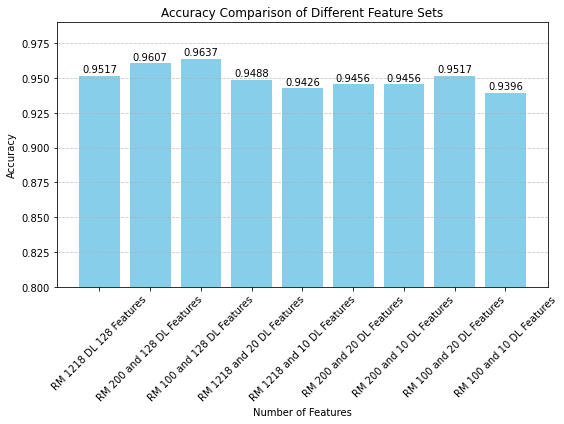

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = Final_accuracy

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets')
plt.ylim(0.8, 0.99)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

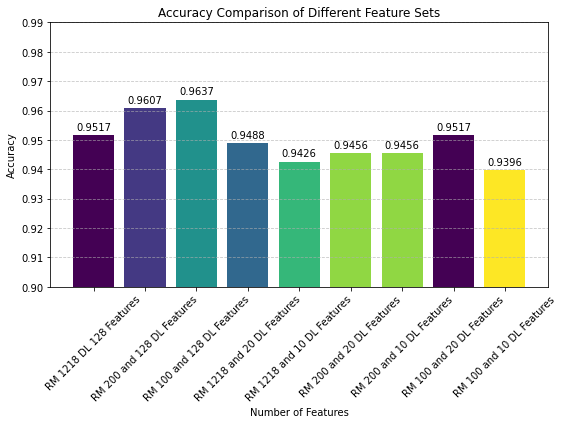

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
Final_accuracy = Final_accuracy

# Extract unique accuracy values and assign colors
unique_accuracies = list(set(Final_accuracy.values()))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_accuracies)))
color_map = {acc: color for acc, color in zip(unique_accuracies, colors)}

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(Final_accuracy.keys(), Final_accuracy.values(), color=[color_map[acc] for acc in Final_accuracy.values()])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets')
plt.ylim(0.9, 0.99)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Input
import os
import datetime
import tensorflow as tf
import joblib
import SimpleITK as sitk
import numpy as np
from radiomics import featureextractor,imageoperations
import os
import pandas as pd
from pandas import DataFrame as DF
import warnings
import time
from time import sleep
from tqdm import tqdm
from skimage import measure

In [28]:
Final_accuracy_test={}

In [29]:
import datetime

# Get the current date
current_date = datetime.date.today()

# Format the date as a string in the desired format
current_date = current_date.strftime("%Y-%m-%d")
current_date

'2024-06-09'

In [30]:
Test_Data=f"./Radiomics_Features_Test.csv"


In [31]:
test_df=pd.read_csv(Test_Data)
test_df.shape
#from sklearn.preprocessing import StandardScaler
#X_standardized = StandardScaler().fit_transform(Rm_200)



(279, 1221)

In [32]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the model
model = load_model('feature_extractor_model_27-05-2024_128.h5')

# Load or prepare your test data (replace this with your actual test data)
# X_test = ... 
# y_test = ...
train_data_path = r'./Test_Roi_file'
train_patients = [name for name in os.listdir(train_data_path) if os.path.isfile(os.path.join(train_data_path, name))]
file_list = sorted(train_patients)
data = [np.expand_dims(np.load(f'{train_data_path}/{file}'), axis=-1) for file in file_list]
X_test = np.array(data)
# Ensure X_test is a NumPy array
# X_test = np.array(X_test)

# Make predictions
predictions = model.predict(X_test)

predictions_df = pd.DataFrame(predictions)

# Save to CSV
predictions_df.to_csv('Deep_Learning_Test.csv', index=False)
# For a classification model, you might need to convert predictions to class labels

predictions_df=pd.read_csv('Deep_Learning_Test.csv')

9/9 [==============================] - 46s 5s/step


Radiomics Model with 1218 Features

In [33]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_1218_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00052768 0.00049971 0.00058926 ... 0.         0.02478749 0.00196837]
Number of features: 1347
Class labels: [0 1]
Number of classes: 2


In [34]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_1218_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id','Malignancy'])
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_1 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_1)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:

y_test_p=pd.DataFrame(y_pred_best_1)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_1218_128.csv"
y_test_p.to_csv(Pr_file)

In [36]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]




In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_1)
report = classification_report(y_test, y_pred_best_1)
conf_matrix = confusion_matrix(y_test, y_pred_best_1)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 128 ']=accuracy

Accuracy: 0.8673835125448028
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       219
           1       0.65      0.85      0.73        60

    accuracy                           0.87       279
   macro avg       0.80      0.86      0.82       279
weighted avg       0.89      0.87      0.87       279

Confusion Matrix:
 [[191  28]
 [  9  51]]


200 Radiomics 128 DL Features

In [38]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_200_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00131453 0.00189684 0.00116487 0.0028195  0.00129266 0.00154701
 0.00195372 0.00244059 0.00157267 0.0026826  0.00294511 0.00187218
 0.00256795 0.00257008 0.00205815 0.00267919 0.00221678 0.00212029
 0.00213703 0.00211839 0.00171675 0.00275652 0.00165358 0.00257381
 0.00196915 0.00215156 0.00166054 0.00122378 0.0024526  0.00101163
 0.00154098 0.00178087 0.00341654 0.0033017  0.00179036 0.00158513
 0.00250141 0.00278234 0.00213967 0.00222999 0.00209582 0.00239304
 0.00118499 0.00108862 0.00631873 0.00207445 0.00187493 0.00187945
 0.00167272

In [39]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_200_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df[RM_200_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_2 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_2)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [40]:
y_test_p=pd.DataFrame(y_pred_best_2)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_200_128.csv"
y_test_p.to_csv(Pr_file)

In [41]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_2)
report = classification_report(y_test, y_pred_best_2)
conf_matrix = confusion_matrix(y_test, y_pred_best_2)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 128']=accuracy

Accuracy: 0.9032258064516129
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       219
           1       0.78      0.77      0.77        60

    accuracy                           0.90       279
   macro avg       0.86      0.85      0.86       279
weighted avg       0.90      0.90      0.90       279

Confusion Matrix:
 [[206  13]
 [ 14  46]]


100 Radiomics 128 Deep Learning Features

In [43]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_100_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00268927 0.00431645 0.00198078 0.00319191 0.00274567 0.00283141
 0.0038297  0.00349992 0.00248176 0.00323655 0.00555658 0.0035901
 0.00321345 0.00355648 0.00338861 0.00456763 0.00377414 0.0032055
 0.00375382 0.00259783 0.00353611 0.00421454 0.00261286 0.00294568
 0.00343425 0.00294819 0.00290032 0.00273294 0.00375377 0.0017377
 0.00303104 0.00285922 0.00655578 0.00444522 0.00271891 0.00287266
 0.00462112 0.00351198 0.00210375 0.00259989 0.00422631 0.00426808
 0.00234356 0.00198619 0.00672348 0.00368049 0.00290743 0.00299614
 0.00277075 0.

In [44]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_100_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df[RM_100_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_3 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_3)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [45]:
y_test_p=pd.DataFrame(y_pred_best_3)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_100_128.csv"
y_test_p.to_csv(Pr_file)

In [46]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_3)
report = classification_report(y_test, y_pred_best_3)
conf_matrix = confusion_matrix(y_test, y_pred_best_3)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 100 DL 128  Features']=accuracy

Accuracy: 0.921146953405018
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       219
           1       0.81      0.83      0.82        60

    accuracy                           0.92       279
   macro avg       0.88      0.89      0.88       279
weighted avg       0.92      0.92      0.92       279

Confusion Matrix:
 [[207  12]
 [ 10  50]]


Radiomics 1218 Deep Learning 20

In [48]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_1218_20_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00083966 0.00066331 0.0007092  ... 0.00457008 0.00374021 0.00944133]
Number of features: 1239
Class labels: [0 1]
Number of classes: 2


In [49]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_1218_20_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id','Malignancy'])
DL_20=predictions_df[DL_20_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,DL_20], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_4 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_4)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [50]:
y_test_p=pd.DataFrame(y_pred_best_4)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_1218_20.csv"
y_test_p.to_csv(Pr_file)

In [51]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_4)
report = classification_report(y_test, y_pred_best_4)
conf_matrix = confusion_matrix(y_test, y_pred_best_4)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 20  ']=accuracy

Accuracy: 0.899641577060932
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       219
           1       0.77      0.77      0.77        60

    accuracy                           0.90       279
   macro avg       0.85      0.85      0.85       279
weighted avg       0.90      0.90      0.90       279

Confusion Matrix:
 [[205  14]
 [ 14  46]]


RM 1218 DL 10

In [53]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_1218_10_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.0009042  0.00090066 0.00107431 ... 0.02403458 0.03715499 0.04436817]
Number of features: 1229
Class labels: [0 1]
Number of classes: 2


In [54]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_1218_10_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id','Malignancy'])
DL_10=predictions_df[DL_10_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,DL_10], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_5 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_5)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [55]:
y_test_p=pd.DataFrame(y_pred_best_5)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_1218_10.csv"
y_test_p.to_csv(Pr_file)

In [56]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_5)
report = classification_report(y_test, y_pred_best_5)
conf_matrix = confusion_matrix(y_test, y_pred_best_5)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 10  ']=accuracy

Accuracy: 0.8745519713261649
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       219
           1       0.73      0.67      0.70        60

    accuracy                           0.87       279
   macro avg       0.82      0.80      0.81       279
weighted avg       0.87      0.87      0.87       279

Confusion Matrix:
 [[204  15]
 [ 20  40]]


In [58]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_200_20_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_200 = test_df[RM_200_top_feature_names]
DL_20=predictions_df[DL_20_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_200,DL_20], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_6 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_6)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [59]:
y_test_p=pd.DataFrame(y_pred_best_6)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_200_20.csv"
y_test_p.to_csv(Pr_file)

In [60]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_6)
report = classification_report(y_test, y_pred_best_6)
conf_matrix = confusion_matrix(y_test, y_pred_best_6)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 20  ']=accuracy

Accuracy: 0.9068100358422939
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       219
           1       0.77      0.82      0.79        60

    accuracy                           0.91       279
   macro avg       0.86      0.87      0.87       279
weighted avg       0.91      0.91      0.91       279

Confusion Matrix:
 [[204  15]
 [ 11  49]]


In [62]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_200_10_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00213136 0.00282393 0.00097334 0.00267044 0.00120603 0.00237061
 0.00216301 0.00332892 0.00264403 0.00391601 0.00459363 0.00304939
 0.00224309 0.0039138  0.00342818 0.00407748 0.00287412 0.00283645
 0.00223502 0.00125142 0.0019457  0.00374613 0.00208626 0.00305619
 0.00262471 0.00323159 0.00271562 0.00201574 0.00359493 0.00057836
 0.00275356 0.00197059 0.00571223 0.00350203 0.00272388 0.00277539
 0.00331824 0.0022624  0.00134276 0.00201281 0.00266626 0.00352996
 0.00197893 0.00175337 0.00769609 0.00257118 0.0023061  0.00244025
 0.00220622

In [63]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_200_10_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_200 = test_df[RM_200_top_feature_names]
DL_10=predictions_df[DL_10_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_200,DL_10], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_7 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_7)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [64]:
y_test_p=pd.DataFrame(y_pred_best_7)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_200_10.csv"
y_test_p.to_csv(Pr_file)

In [65]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_7)
report = classification_report(y_test, y_pred_best_7)
conf_matrix = confusion_matrix(y_test, y_pred_best_7)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 10  ']=accuracy

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       219
           1       0.74      0.75      0.74        60

    accuracy                           0.89       279
   macro avg       0.83      0.84      0.84       279
weighted avg       0.89      0.89      0.89       279

Confusion Matrix:
 [[203  16]
 [ 15  45]]


In [67]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_100_20_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00339998 0.00477541 0.00195943 0.00433045 0.0032956  0.00327181
 0.00409331 0.0042288  0.0022398  0.00343274 0.00588441 0.00420033
 0.00399901 0.00432552 0.00347391 0.00555117 0.00430426 0.00386109
 0.00302679 0.00278291 0.00308589 0.00420214 0.00349615 0.00334292
 0.003629   0.00472288 0.00441664 0.00302747 0.00484027 0.00187698
 0.00447559 0.00337672 0.00766382 0.00503297 0.00262431 0.00377216
 0.00568079 0.00450515 0.00250933 0.00368795 0.00569575 0.00603818
 0.00300261 0.00305709 0.0088584  0.00450866 0.00364189 0.00420826
 0.00365475

In [68]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_100_20_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_100 = test_df[RM_100_top_feature_names]
DL_20=predictions_df[DL_20_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_100,DL_20], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_8 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_8)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [69]:
y_test_p=pd.DataFrame(y_pred_best_8)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_100_20.csv"
y_test_p.to_csv(Pr_file)

In [70]:
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_8)
report = classification_report(y_test, y_pred_best_8)
conf_matrix = confusion_matrix(y_test, y_pred_best_8)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 100 DL 20  ']=accuracy

Accuracy: 0.899641577060932
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       219
           1       0.75      0.80      0.77        60

    accuracy                           0.90       279
   macro avg       0.85      0.86      0.85       279
weighted avg       0.90      0.90      0.90       279

Confusion Matrix:
 [[203  16]
 [ 12  48]]


In [72]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_100_10_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00384981 0.00532933 0.00231265 0.0044702  0.00387093 0.00328719
 0.00491128 0.00524523 0.00472862 0.00595308 0.00719573 0.00584017
 0.00545332 0.01073432 0.00607612 0.00653887 0.00528907 0.00369879
 0.00370199 0.00363572 0.00500771 0.00822724 0.00420948 0.00352457
 0.00371133 0.00397828 0.00550278 0.00312153 0.00606405 0.00324106
 0.00319542 0.00503308 0.00680976 0.00707298 0.0023382  0.00444368
 0.00446849 0.00541404 0.00244929 0.00441529 0.00606999 0.0060974
 0.00409109 0.0041147  0.00966946 0.00607693 0.00538159 0.00419154
 0.00543275 

In [73]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_100_10_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_100 = test_df[RM_100_top_feature_names]
DL_10=predictions_df[DL_10_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_100,DL_10], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_9= model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_9)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


In [74]:
y_test_p=pd.DataFrame(y_pred_best_9)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_100_10.csv"
y_test_p.to_csv(Pr_file)

In [75]:
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_9)
report = classification_report(y_test, y_pred_best_9)
conf_matrix = confusion_matrix(y_test, y_pred_best_9)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 100 DL 10  ']=accuracy

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       219
           1       0.74      0.75      0.74        60

    accuracy                           0.89       279
   macro avg       0.83      0.84      0.84       279
weighted avg       0.89      0.89      0.89       279

Confusion Matrix:
 [[203  16]
 [ 15  45]]


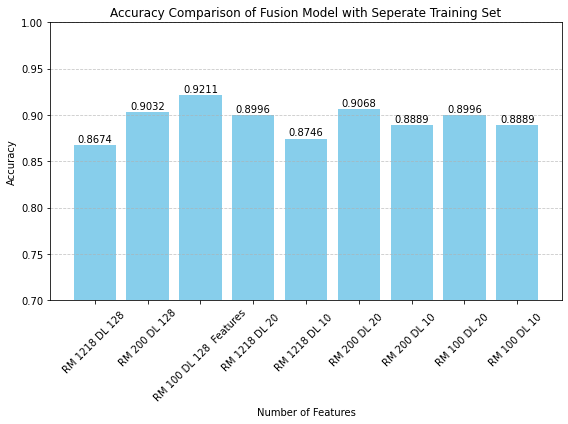

In [77]:
data = Final_accuracy_test

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Fusion Model with Seperate Training Set')
plt.ylim(0.7, 1.)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

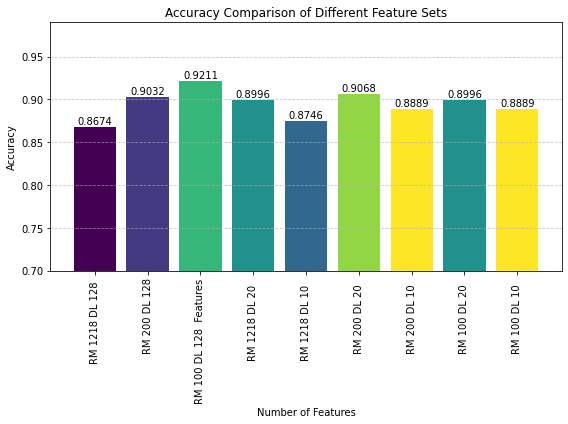

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
Final_accuracy = Final_accuracy_test

# Extract unique accuracy values and assign colors
unique_accuracies = list(set(Final_accuracy.values()))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_accuracies)))
color_map = {acc: color for acc, color in zip(unique_accuracies, colors)}

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(Final_accuracy.keys(), Final_accuracy.values(), color=[color_map[acc] for acc in Final_accuracy.values()])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets')
plt.ylim(0.7, 0.99)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [84]:
Final_accuracy_test

{'RM 1218 DL 128 ': 0.8673835125448028,
 'RM 200 DL 128': 0.9032258064516129,
 'RM 100 DL 128  Features': 0.921146953405018,
 'RM 1218 DL 20  ': 0.899641577060932,
 'RM 1218 DL 10  ': 0.8745519713261649,
 'RM 200 DL 20  ': 0.9068100358422939,
 'RM 200 DL 10  ': 0.8888888888888888,
 'RM 100 DL 20  ': 0.899641577060932,
 'RM 100 DL 10  ': 0.8888888888888888}

In [82]:
Final_Train_accuracy={'RM 1218 DL 128 Features': 0.9516616314199395,
 'RM 200 and 128 DL Features': 0.9607250755287009,
 'RM 100 and 128 DL Features': 0.9637462235649547,
 'RM 1218 and 20 DL Features': 0.9487951807228916,
 'RM 1218 and 10 DL Features': 0.9425981873111783,
 'RM 200 and 20 DL Features': 0.945619335347432,
 'RM 200 and 10 DL Features': 0.945619335347432,
 'RM 100 and 20 DL Features': 0.9516616314199395,
 'RM 100 and 10 DL Features': 0.9395770392749244}

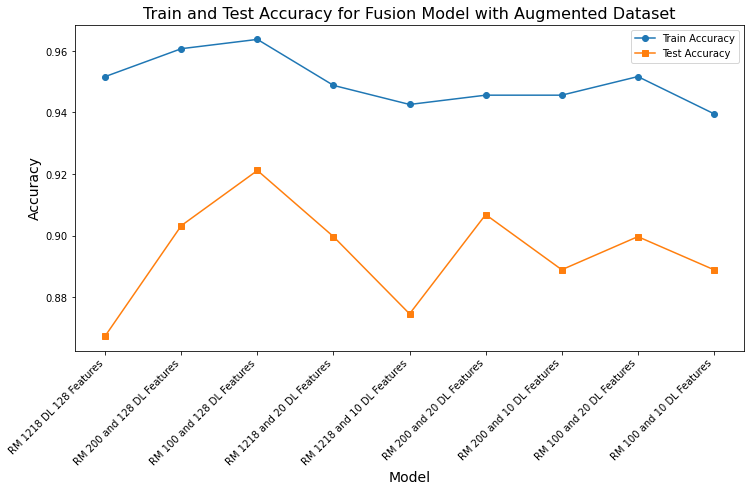

In [83]:
import matplotlib.pyplot as plt

# Data
models = list(Final_Train_accuracy.keys())
train_accuracy = list(Final_Train_accuracy.values())
test_accuracy = list(Final_accuracy_test.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the lines
ax.plot(models, train_accuracy, label='Train Accuracy', marker='o')
ax.plot(models, test_accuracy, label='Test Accuracy', marker='s')

# Set the title and axis labels
ax.set_title('Train and Test Accuracy for Fusion Model with Augmented Dataset', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
Final_accuracy_test

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
Final_accuracy = Final_Train_accuracy

# Extract unique accuracy values and assign colors
unique_accuracies = list(set(Final_accuracy.values()))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_accuracies)))
color_map = {acc: color for acc, color in zip(unique_accuracies, colors)}

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(Final_accuracy.keys(), Final_accuracy.values(), color=[color_map[acc] for acc in Final_accuracy.values()])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets: Training')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
from keras.models import load_model

# Load the saved model from the .h5 file
model = load_model('./feature_extractor_model_27-05-2024_128.h5')

# Print the model summary
model.summary()

# Get the model input shape
print("Input shape:", model.input_shape)

# Get the model output shape
print("Output shape:", model.output_shape)

# Get the number of layers in the model
print("Number of layers:", len(model.layers))

# Print the details of each layer
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name} ({layer.__class__.__name__})")
    print("  Input shape:", layer.input_shape)
    print("  Output shape:", layer.output_shape)
    if hasattr(layer, 'activation'):
        print("  Activation function:", layer.activation.__name__)
    if hasattr(layer, 'units'):
        print("  Number of units:", layer.units)
    if hasattr(layer, 'kernel_initializer'):
        print("  Kernel initializer:", layer.kernel_initializer.__class__.__name__)
    if hasattr(layer, 'bias_initializer'):
        print("  Bias initializer:", layer.bias_initializer.__class__.__name__)
    print()